In [1]:
import pandas as pd

# EDA (Explorary Data Analysis)

In [70]:
# Veri setinin okunması
df = pd.read_csv('fake_news_dataset.csv')

In [3]:
df.info

<bound method DataFrame.info of           id                                              title  \
0          0  House Dem Aide: We Didn’t Even See Comey’s Let...   
1          1  FLYNN: Hillary Clinton, Big Woman on Campus - ...   
2          2                  Why the Truth Might Get You Fired   
3          3  15 Civilians Killed In Single US Airstrike Hav...   
4          4  Iranian woman jailed for fictional unpublished...   
...      ...                                                ...   
20795  20795  Rapper T.I.: Trump a ’Poster Child For White S...   
20796  20796  N.F.L. Playoffs: Schedule, Matchups and Odds -...   
20797  20797  Macy’s Is Said to Receive Takeover Approach by...   
20798  20798  NATO, Russia To Hold Parallel Exercises In Bal...   
20799  20799                          What Keeps the F-35 Alive   

                                          author  \
0                                  Darrell Lucus   
1                                Daniel J. Flynn   
2      

In [4]:
df.shape

(20800, 5)

In [5]:
df.isnull().sum()

id           0
title      558
author    1957
text        39
label        0
dtype: int64

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

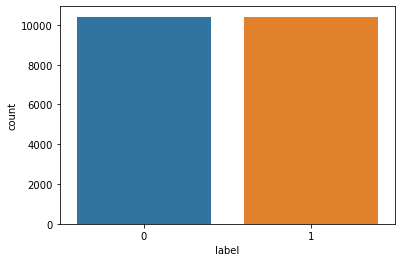

In [7]:
_ = sns.countplot(x="label", data=df)

In [12]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

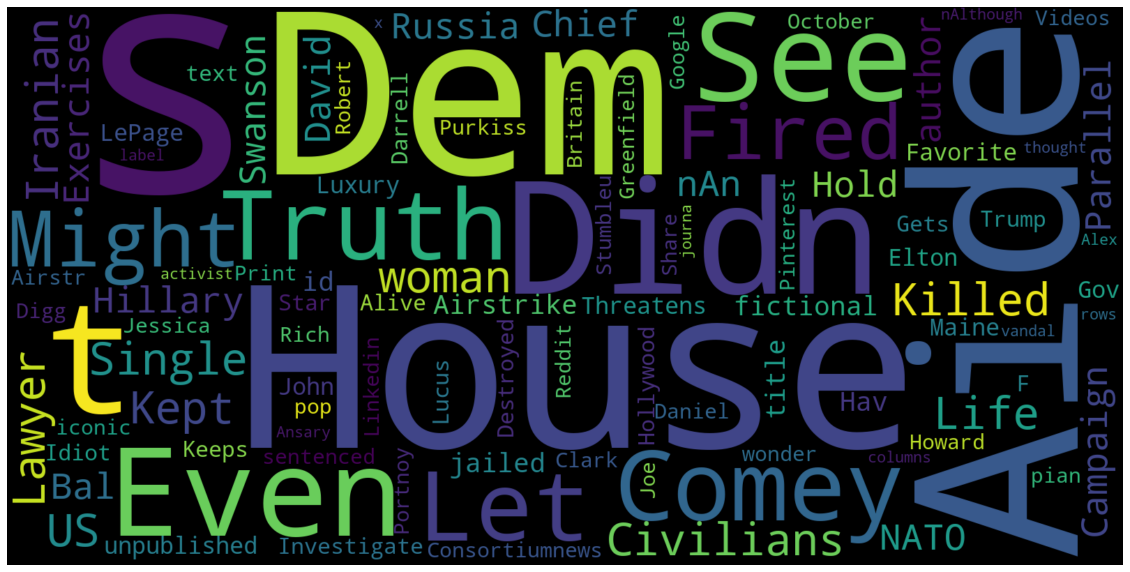

In [13]:
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
text = (str)(df[df['label'] == 1])
plt.figure(figsize = (20,20))
wordcloud = WordCloud(max_words = 5000, width = 1600, height = 800).generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [14]:
# Sahte haberlerin incelenmesi
label1_df = df[df['label'] == 1]
print (label1_df)

          id                                              title  \
0          0  House Dem Aide: We Didn’t Even See Comey’s Let...   
2          2                  Why the Truth Might Get You Fired   
3          3  15 Civilians Killed In Single US Airstrike Hav...   
4          4  Iranian woman jailed for fictional unpublished...   
6          6  Life: Life Of Luxury: Elton John’s 6 Favorite ...   
...      ...                                                ...   
20788  20788  Maine’s Gov. LePage Threatens To ‘Investigate’...   
20791  20791  Lawyer Who Kept Hillary Campaign Chief Out of ...   
20793  20793  Idiot Who Destroyed Trump Hollywood Star Gets ...   
20798  20798  NATO, Russia To Hold Parallel Exercises In Bal...   
20799  20799                          What Keeps the F-35 Alive   

                   author                                               text  \
0           Darrell Lucus  House Dem Aide: We Didn’t Even See Comey’s Let...   
2      Consortiumnews.com  Why the 

In [15]:
df['label'].value_counts()

1    10413
0    10387
Name: label, dtype: int64

# Data Preprocessing (Veri Ön İşleme)

In [71]:
# Bağımsız değişkenler X değerine atanıyor
X = df.drop('label' ,axis=1)

In [72]:
X.head()

,id,title,author,text
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ..."
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...


In [18]:
# Bağımlı değişken "label" y değerine atanıyor
y = df['label']

In [19]:
y.head()

0    1
1    0
2    1
3    1
4    1
Name: label, dtype: int64

In [20]:
from sklearn.feature_extraction.text import CountVectorizer

In [21]:
# Eksik değerler siliniyor
df = df.dropna()

In [22]:
df.shape

(18285, 5)

In [23]:
df.isnull().sum()

id        0
title     0
author    0
text      0
label     0
dtype: int64

In [24]:
messages = df.copy() 

In [25]:
messages

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1
...,...,...,...,...,...
20795,20795,Rapper T.I.: Trump a ’Poster Child For White S...,Jerome Hudson,Rapper T. I. unloaded on black celebrities who...,0
20796,20796,"N.F.L. Playoffs: Schedule, Matchups and Odds -...",Benjamin Hoffman,When the Green Bay Packers lost to the Washing...,0
20797,20797,Macy’s Is Said to Receive Takeover Approach by...,Michael J. de la Merced and Rachel Abrams,The Macy’s of today grew from the union of sev...,0
20798,20798,"NATO, Russia To Hold Parallel Exercises In Bal...",Alex Ansary,"NATO, Russia To Hold Parallel Exercises In Bal...",1


In [26]:
# Silme işleminden sonra id'lerde kayıp yaşandığından dolayı, indekesleri sıfırılıyoruz.
messages.reset_index(inplace=True)

In [27]:
messages

,index,id,title,author,text,label
0,0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1
...,...,...,...,...,...,...
18280,20795,20795,Rapper T.I.: Trump a ’Poster Child For White S...,Jerome Hudson,Rapper T. I. unloaded on black celebrities who...,0
18281,20796,20796,"N.F.L. Playoffs: Schedule, Matchups and Odds -...",Benjamin Hoffman,When the Green Bay Packers lost to the Washing...,0
18282,20797,20797,Macy’s Is Said to Receive Takeover Approach by...,Michael J. de la Merced and Rachel Abrams,The Macy’s of today grew from the union of sev...,0
18283,20798,20798,"NATO, Russia To Hold Parallel Exercises In Bal...",Alex Ansary,"NATO, Russia To Hold Parallel Exercises In Bal...",1


In [28]:
messages['content']=messages['title']+' '+messages['author']

In [29]:
# stopwords, özel karakterler, sayılar veriden çıkartılıyor ve tüm metinler küçük harfe dönüştürülüyor

from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import re
ps = PorterStemmer()
corpus = []
for i in range(0, len(messages)):
    review = re.sub('[^a-zA-Z]', ' ', messages['content'][i])
    review = review.lower() #lowercase
    review = review.split() #splitting strings
    
    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)

In [30]:
#bag of words oluşturluyor
cv = CountVectorizer(max_features=5000, ngram_range=(1,3))
# steming işleminden elde edilen metinler(corpus) Bag of word oluşturmak için X değişkenine atanıyor.
X = cv.fit_transform(corpus).toarray()


In [31]:
X.shape

(18285, 5000)

In [32]:
y = messages['label']

In [33]:
y

0        1
1        0
2        1
3        1
4        1
        ..
18280    0
18281    0
18282    0
18283    1
18284    1
Name: label, Length: 18285, dtype: int64

In [34]:
# veri setimiz makine öğrenmesi modellerinde kullanılmak üzere test ve train olarak 2 parçaya ayrılıyor
# veri setinin train kısmı ile makine öğrenmesi modelleri eğitilir. Test ile de modellerin doğruluk sonucu kontrol edilir.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)
# random_state ile her çalıştırmada eşit şekilde dağıtılması için kullanılır. 

In [35]:
print(X.shape, X_train.shape, X_test.shape)

(18285, 5000) (12250, 5000) (6035, 5000)


In [36]:
cv.get_feature_names()[:20]

['aaron',
 'aaron carrol',
 'aaron kesel',
 'aaron klein',
 'aaron klein ali',
 'abandon',
 'abbi',
 'abbi goodnough',
 'abc',
 'abduct',
 'abe',
 'abedin',
 'abelson',
 'abort',
 'abram',
 'absolut',
 'abus',
 'accept',
 'access',
 'access pipelin']

In [37]:
count_df = pd.DataFrame(X_train, columns=cv.get_feature_names())

In [38]:
count_df.head()

,aaron,aaron carrol,aaron kesel,aaron klein,aaron klein ali,abandon,abbi,abbi goodnough,abc,abduct,...,zero hedg,zika,zika viru,zionist,zone,zraick,zraick sandra,zraick sandra stevenson,zu,zuess
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [39]:
import matplotlib.pyplot as plt

In [40]:
def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion Matrix', cmap=plt.cm.Blues):
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    
    if normalize:
        cm = cm.astype('float')/cm.sum(axis=1)[:, np.newaxis]
        print('Normalized Confusion Matrix')
    else:
        print('Confusion Matrix, without normalization')
    
    thresh = cm.max()/2
    for i,j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i,j],
                horizontalalignment='center',
                color='white' if cm[i, j] > thresh else "black")
        
    plt.tight_layout()
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')

# MultinomialNaiveBayes Algoritması

In [73]:
from sklearn.naive_bayes import MultinomialNB
classifier_MNB = MultinomialNB()

In [74]:
from sklearn import metrics
import numpy as np
import itertools

**MultinominalNaiveBayes****
Accuracy: 97.498
Recall: 95.956
f1-score: 97.112
Confusion Matrix, without normalization


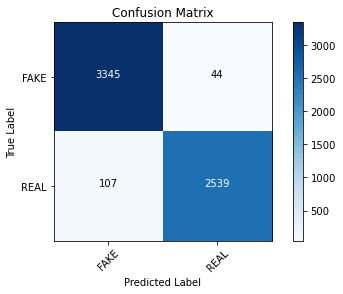

In [75]:
classifier_MNB.fit(X_train, y_train)
pred_MNB = classifier_MNB.predict(X_test)
accuracy_score = metrics.accuracy_score(y_test,pred_MNB)*100
recall = metrics.recall_score(y_test,pred_MNB)*100
f1_score = metrics.f1_score(y_test,pred_MNB)*100
print("**MultinominalNaiveBayes****")
print('Accuracy: %0.3f'% accuracy_score)
print('Recall: %0.3f'% recall)
print('f1-score: %0.3f'% f1_score)
cm = metrics.confusion_matrix(y_test, pred_MNB)
plot_confusion_matrix(cm, classes=['FAKE', 'REAL'])


# Logistic Regression

In [49]:
from sklearn.linear_model import LogisticRegression
classifier_LR= LogisticRegression()
classifier_LR.fit(X_train,y_train)
pred_LR=classifier_LR.predict(X_test)


**Logistic Regression****
Accuracy: 99.387
Recall: 99.622
f1-score: 99.303
Confusion Matrix, without normalization


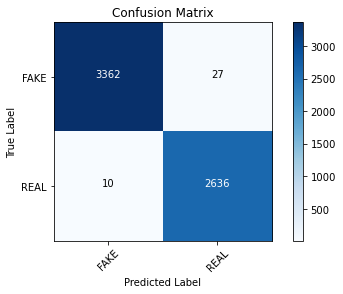

In [51]:
accuracy_score = metrics.accuracy_score(y_test,pred_LR)*100
recall = metrics.recall_score(y_test,pred_LR)*100
f1_score = metrics.f1_score(y_test,pred_LR)*100
print("**Logistic Regression****")
print('Accuracy: %0.3f'% accuracy_score)
print('Recall: %0.3f'% recall)
print('f1-score: %0.3f'% f1_score)
cm = metrics.confusion_matrix(y_test, pred_LR)
plot_confusion_matrix(cm, classes=['FAKE', 'REAL'])

# XGboost 

In [53]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

In [54]:
XGboost_model = XGBClassifier()
XGboost_model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

Confusion Matrix, without normalization


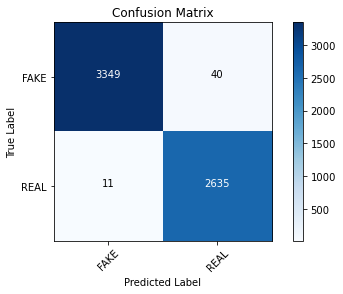

In [55]:
y_pred = XGboost_model.predict(X_test)
predictions = [round(value) for value in y_pred]
cm = metrics.confusion_matrix(y_test, predictions)
plot_confusion_matrix(cm, classes=['FAKE', 'REAL'])

In [56]:
accuracy_score = metrics.accuracy_score(y_test,predictions)*100
recall = metrics.recall_score(y_test,predictions)*100
f1_score = metrics.f1_score(y_test,predictions)*100
print("**** XGBosst******")
print('Accuracy: %0.3f'% accuracy_score)
print('Recall: %0.3f'% recall)
print('f1-score: %0.3f'% f1_score)

**** XGBosst******
Accuracy: 99.155
Recall: 99.584
f1-score: 99.042


# Catboost

In [58]:
from catboost import CatBoostClassifier

In [59]:
cat_model=CatBoostClassifier().fit(X_train,y_train)

Learning rate set to 0.030031
0:	learn: 0.6421485	total: 217ms	remaining: 3m 36s
1:	learn: 0.5967220	total: 286ms	remaining: 2m 22s
2:	learn: 0.5578206	total: 363ms	remaining: 2m
3:	learn: 0.5213569	total: 446ms	remaining: 1m 51s
4:	learn: 0.4875299	total: 517ms	remaining: 1m 42s
5:	learn: 0.4605083	total: 578ms	remaining: 1m 35s
6:	learn: 0.4352845	total: 710ms	remaining: 1m 40s
7:	learn: 0.4144530	total: 808ms	remaining: 1m 40s
8:	learn: 0.3943926	total: 922ms	remaining: 1m 41s
9:	learn: 0.3769968	total: 995ms	remaining: 1m 38s
10:	learn: 0.3592891	total: 1.11s	remaining: 1m 39s
11:	learn: 0.3452528	total: 1.31s	remaining: 1m 48s
12:	learn: 0.3314824	total: 1.46s	remaining: 1m 51s
13:	learn: 0.3198405	total: 1.66s	remaining: 1m 56s
14:	learn: 0.3085898	total: 1.79s	remaining: 1m 57s
15:	learn: 0.2987017	total: 1.97s	remaining: 2m 1s
16:	learn: 0.2894594	total: 2.12s	remaining: 2m 2s
17:	learn: 0.2814053	total: 2.42s	remaining: 2m 11s
18:	learn: 0.2742899	total: 2.65s	remaining: 2m 16

In [61]:
cat_pred=cat_model.predict(X_test)


**CatBoost****
Accuracy: 99.155
Recall: 99.584
f1-score: 99.396
Confusion Matrix, without normalization


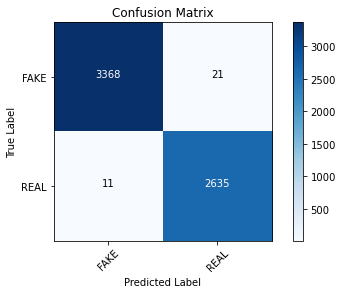

In [62]:
recall = metrics.recall_score(y_test,cat_pred)*100
f1_score = metrics.f1_score(y_test,cat_pred)*100
print("**CatBoost****")
print('Accuracy: %0.3f'% accuracy_score)
print('Recall: %0.3f'% recall)
print('f1-score: %0.3f'% f1_score)
cm = metrics.confusion_matrix(y_test, cat_pred)
plot_confusion_matrix(cm, classes=['FAKE', 'REAL'])

# Modellerin Karşılaştırılması 

In [63]:
modeller = [
    classifier,
    logistic_regression,
    XGboost_model,
    cat_model
    
]


In [64]:
sonuc = []

sonuclar = pd.DataFrame(columns= ["Modeller","Accuracy"])

for model in modeller:
    isimler = model.__class__.__name__
    y_pred = model.predict(X_test)
    dogruluk = metrics.accuracy_score(y_test,y_pred)    
    sonuc = pd.DataFrame([[isimler, dogruluk*100]], columns= ["Modeller","Accuracy"])
    sonuclar = sonuclar.append(sonuc)
    
    
    

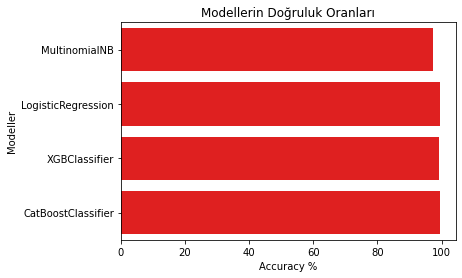

In [65]:
sns.barplot(x= 'Accuracy', y = 'Modeller', data=sonuclar, color="r")
plt.xlabel('Accuracy %')
plt.title('Modellerin Doğruluk Oranları');    

# recal için 

In [66]:
sonuc_recall = []

sonuclar = pd.DataFrame(columns= ["Modeller","Recall"])

for model in modeller:
    isimler = model.__class__.__name__
    y_pred = model.predict(X_test)
    recall = metrics.recall_score(y_test,y_pred)    
    sonuc_recall = pd.DataFrame([[isimler, recall*100]], columns= ["Modeller","Recall"])
    sonuclar = sonuclar.append(sonuc_recall)
    
    

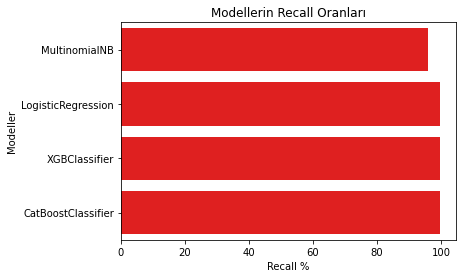

In [67]:
sns.barplot(x= 'Recall', y = 'Modeller', data=sonuclar, color="r")
plt.xlabel('Recall %')
plt.title('Modellerin Recall Oranları');    

## f-1 score için 

In [68]:
sonuc_f1 = []

sonuclar = pd.DataFrame(columns= ["Modeller","f1_score"])

for model in modeller:
    isimler = model.__class__.__name__
    y_pred = model.predict(X_test)
    f1_score = metrics.f1_score(y_test,y_pred)    
    sonuc_f1 = pd.DataFrame([[isimler, f1_score*100]], columns= ["Modeller","f1_score"])
    sonuclar = sonuclar.append(sonuc_f1)
    
    

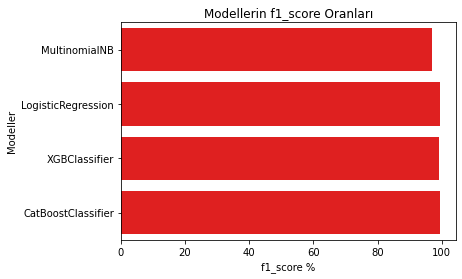

In [69]:
sns.barplot(x= 'f1_score', y = 'Modeller', data=sonuclar, color="r")
plt.xlabel('f1_score %')
plt.title('Modellerin f1_score Oranları');    